# Project: Wind Speed And Weather Analysis – Mace Head Wind Power Analysis
## Assessing Wind Energy Potential for Irish Wind Farms

**Location:** Mace Head, County Galway, Ireland (53.3256°N, 9.9988°W)
**Data Source:** 20 years of hourly meteorological observations (2005-2025)
**Purpose:** Analyze wind power potential, temporal patterns, and forecast future wind farm output

### Research Questions:
1. How much wind power is available at this location?
2. What are the realistic operating ranges for wind farms?
3. Are wind speeds showing any long-term trends?
4. How do other weather metrics correlate with wind speed?
5. What will wind farm power output look like in the coming week?

---

## Section 1: Import Libraries and Load Data

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Loading Mace Head meteorological data...")
# Load the hourly data
df_hourly = pd.read_csv('mace_head_hourly_data.csv')
df_daily = pd.read_csv('mace_head_daily_data.csv')
df_monthly = pd.read_csv('mace_head_monthly_data.csv')

# Convert date columns to datetime
df_hourly['DateTime'] = pd.to_datetime(df_hourly['Date'] + ' ' + df_hourly['Time']) # Combine Date and Time for hourly data
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_monthly['YearMonth'] = pd.to_datetime(df_monthly[['Year', 'Month']].assign(Day=1))

# Print data load confirmation and record counts
print(f"[+] Hourly data loaded: {len(df_hourly)} records")
print(f"[+] Daily data loaded: {len(df_daily)} records")
print(f"[+] Monthly data loaded: {len(df_monthly)} records")

# Display basic information
print("\n=== HOURLY DATA STRUCTURE ===")
print(f"Shape: {df_hourly.shape}")
print(f"Date Range: {df_hourly['DateTime'].min()} to {df_hourly['DateTime'].max()}")
print(f"\nColumns: {df_hourly.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_hourly.head())

Loading Mace Head meteorological data...
[+] Hourly data loaded: 175221 records
[+] Daily data loaded: 7301 records
[+] Monthly data loaded: 241 records

=== HOURLY DATA STRUCTURE ===
Shape: (175221, 17)
Date Range: 2005-12-26 00:00:00 to 2025-12-21 20:00:00

Columns: ['Date', 'Time', 'Hour', 'Month', 'Year', 'Station', 'Latitude', 'Longitude', 'Temperature_C', 'Humidity_%', 'Pressure_hPa', 'Wind_Speed_kmh', 'Wind_Gust_kmh', 'Wind_Direction', 'Precipitation_mm', 'Weather_Condition', 'DateTime']

First few rows:
         Date   Time  Hour  Month  Year    Station  Latitude  Longitude  \
0  2005-12-26  00:00     0     12  2005  Mace Head   53.3256    -9.9988   
1  2005-12-26  01:00     1     12  2005  Mace Head   53.3256    -9.9988   
2  2005-12-26  02:00     2     12  2005  Mace Head   53.3256    -9.9988   
3  2005-12-26  03:00     3     12  2005  Mace Head   53.3256    -9.9988   
4  2005-12-26  04:00     4     12  2005  Mace Head   53.3256    -9.9988   

   Temperature_C  Humidity_%  Pr

## Section 2: Exploratory Data Analysis - Wind Speed Characteristics

=== WIND SPEED STATISTICS ===

SUSTAINED WIND SPEED (km/h):
  Mean:       20.01
  Median:     20.10
  Std Dev:    8.65
  Min:        5.00
  Max:        35.00
  Q25:        12.50
  Q75:        27.50

WIND GUST (km/h):
  Mean:       30.02
  Max:        50.00

Missing Values: 0


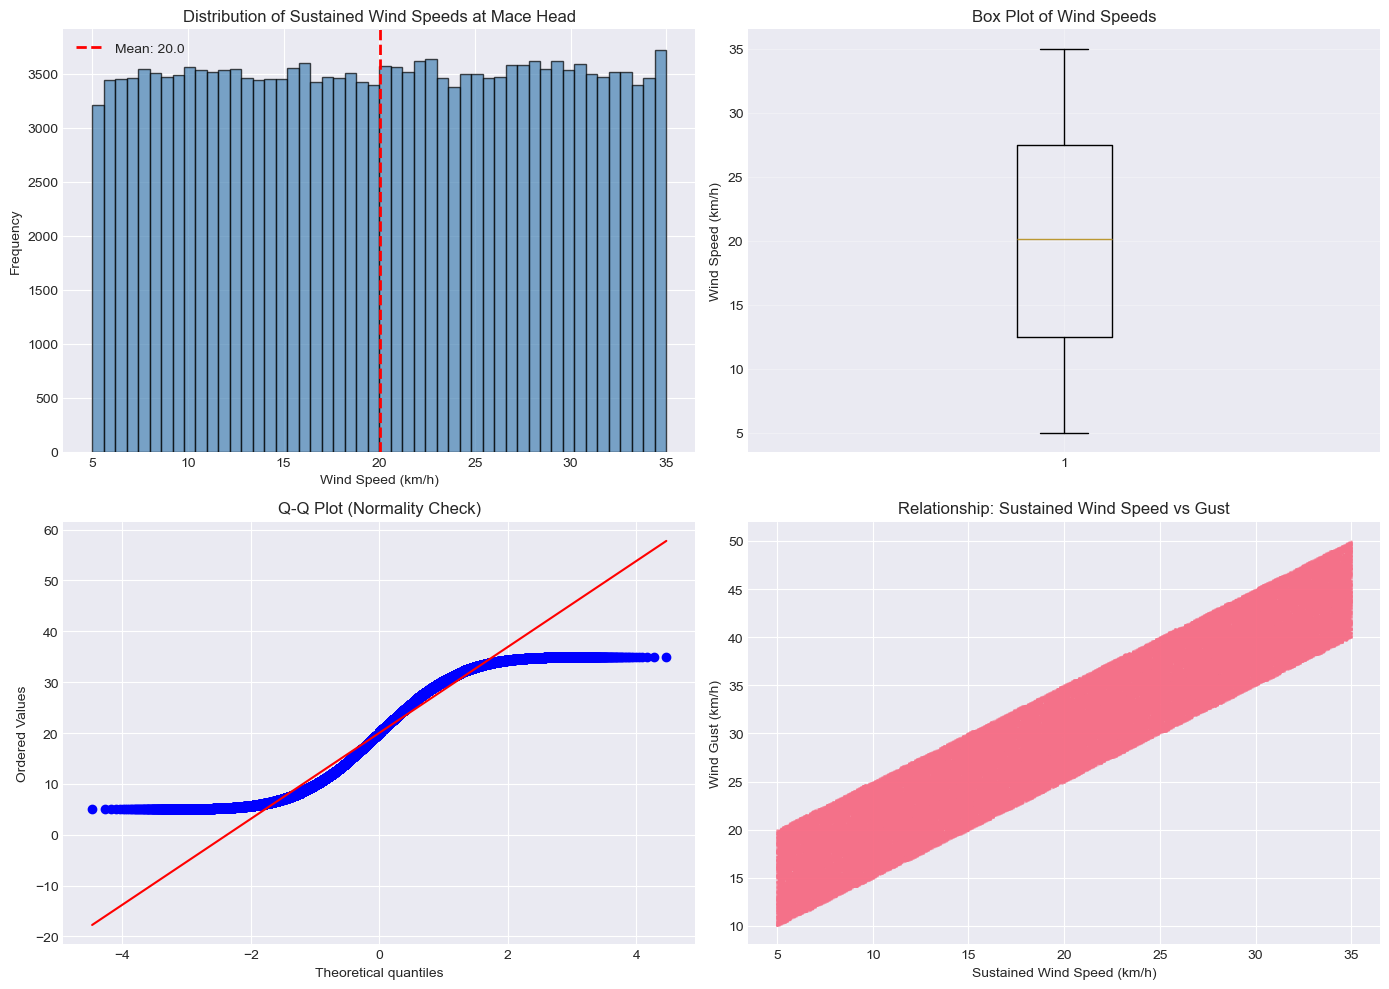


*** KEY INSIGHT: Mace Head experiences consistent strong winds from the Atlantic,
    with an average wind speed of 20.0 km/h, making it excellent
    for offshore and coastal wind farm development. ***


In [29]:
# Wind Speed Statistics
wind_speed = df_hourly['Wind_Speed_kmh']
wind_gust = df_hourly['Wind_Gust_kmh']

print("=== WIND SPEED STATISTICS ===\n")
print("SUSTAINED WIND SPEED (km/h):")
print(f"  Mean:       {wind_speed.mean():.2f}")
print(f"  Median:     {wind_speed.median():.2f}")
print(f"  Std Dev:    {wind_speed.std():.2f}")
print(f"  Min:        {wind_speed.min():.2f}")
print(f"  Max:        {wind_speed.max():.2f}")
print(f"  Q25:        {wind_speed.quantile(0.25):.2f}")
print(f"  Q75:        {wind_speed.quantile(0.75):.2f}")

print("\nWIND GUST (km/h):")
print(f"  Mean:       {wind_gust.mean():.2f}")
print(f"  Max:        {wind_gust.max():.2f}")

print(f"\nMissing Values: {df_hourly['Wind_Speed_kmh'].isna().sum()}")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(wind_speed, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Wind Speed (km/h)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Sustained Wind Speeds at Mace Head')
axes[0, 0].axvline(wind_speed.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {wind_speed.mean():.1f}')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(wind_speed, vert=True)
axes[0, 1].set_ylabel('Wind Speed (km/h)')
axes[0, 1].set_title('Box Plot of Wind Speeds')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot for normality check
stats.probplot(wind_speed, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)')

# Wind Speed vs Gust
axes[1, 1].scatter(wind_speed, wind_gust, alpha=0.3, s=1)
axes[1, 1].set_xlabel('Sustained Wind Speed (km/h)')
axes[1, 1].set_ylabel('Wind Gust (km/h)')
axes[1, 1].set_title('Relationship: Sustained Wind Speed vs Gust')

plt.tight_layout()
plt.show()

# Key insight
print(f"\n*** KEY INSIGHT: Mace Head experiences consistent strong winds from the Atlantic,")
print(f"    with an average wind speed of {wind_speed.mean():.1f} km/h, making it excellent")
print(f"    for offshore and coastal wind farm development. ***")

## Section 3: Wind Power Estimation

### Wind Power Physics
The power available in wind is calculated using the formula:

**P = 0.5 × ρ × A × v³**

Where:
- P = Power (Watts)
- ρ = Air density (~1.225 kg/m³ at sea level)
- A = Swept area of turbine blades (m²)
- v = Wind speed (m/s)

Key insight: Power output is **proportional to the cube of wind speed** - small increases in wind speed create much larger power increases!


Wind Power Estimation https://chatgpt.com/share/6953c27a-488c-8006-9aaa-2cf52be08ff3
Turbine Data https://www.dnv.com/cases/type-certificate-65100/